***Final Group Project (COMP6105)***<br/>
Kary Ng(p1404599)<br/>
Bryant Ho(p1604811)<br/>
Cyril Fong(p1604918)

Project: **Student Performance Classification Analysis**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

# Pre-processing

***Load dataset***


In [ ]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("https://raw.githubusercontent.com/dcuti8/data/main/student-mat.csv", sep=';')
por = pd.read_csv("https://raw.githubusercontent.com/dcuti8/data/main/student-por.csv", sep=';')

# merge datasets
df = pd.concat([mat,por])

In [ ]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [ ]:
df=df.drop(["period1_score","period2_score"],axis=1)

# convert final_score to categorical variable # Good:>14 Fair:10-14 Poor:0~10
df['final_grade'] = 'na'
df.loc[(df.final_score > 14) , 'final_grade'] = 'good' 
df.loc[(df.final_score > 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 10), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,10,poor
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10,poor


In [ ]:
#df.dtypes
#df.describe()
#checking for null values
#df.isnull().any()

***Data normalization***

In [ ]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop(['final_score'], axis=1)#use final_grade as label

#data normalization
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)
dfd.school_support = le.fit_transform(dfd.school_support)
dfd.family_support = le.fit_transform(dfd.family_support)
dfd.paid_classes = le.fit_transform(dfd.paid_classes)
dfd.activities = le.fit_transform(dfd.activities)
dfd.nursery = le.fit_transform(dfd.nursery)
dfd.desire_higher_edu = le.fit_transform(dfd.desire_higher_edu)
dfd.internet = le.fit_transform(dfd.internet)
dfd.romantic = le.fit_transform(dfd.romantic)
dfd.school = le.fit_transform(dfd.school)
dfd.sex = le.fit_transform(dfd.sex)
dfd.address = le.fit_transform(dfd.address)
dfd.family_size = le.fit_transform(dfd.family_size)
dfd.parents_status = le.fit_transform(dfd.parents_status)
dfd.mother_job = le.fit_transform(dfd.mother_job)
dfd.father_job = le.fit_transform(dfd.father_job)
dfd.reason = le.fit_transform(dfd.reason)
dfd.guardian = le.fit_transform(dfd.guardian)

dfd.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,final_grade
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,2
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,2
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,2
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,1
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,2


In [ ]:
#separate the input X and output label y
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade

# see total number of features
print(X.shape)

(1044, 30)


***Feature selection***

 1) parents_status                 0.011298
 2) internet                       0.015111
 3) nursery                        0.016092
 4) address                        0.016150
 5) school_support                 0.017522
 6) school                         0.018753
 7) family_size                    0.018823
 8) romantic                       0.018916
 9) family_support                 0.019184
10) desire_higher_edu              0.019204
11) activities                     0.020392
12) sex                            0.020468
13) guardian                       0.022606
14) weekday_alcohol_usage          0.025177
15) commute_time                   0.027487
16) father_job                     0.034202
17) family_quality                 0.036155
18) reason                         0.037069
19) study_time                     0.038871
20) paid_classes                   0.040849
21) mother_job                     0.041279
22) weekend_alcohol_usage          0.041985
23) mother_education            

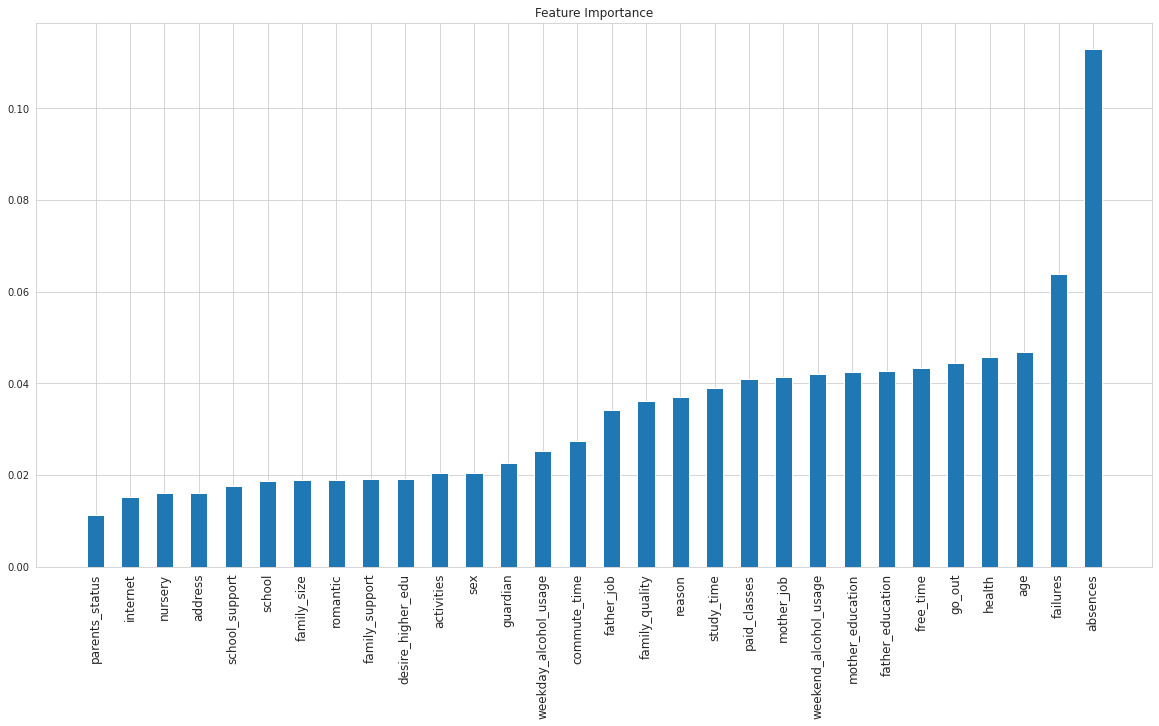

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(n_estimators=500,criterion="entropy",random_state=0)
# fit the model
model.fit(X, y)
# get importance
importances = model.feature_importances_

#sort importance feature
indices = np.argsort(importances)
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]
for f in range(X.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, names[f], importances[indices[f]]))

# Barplot: Add bars
plt.figure(figsize=(20,10))
plt.bar(range(X.shape[1]), importances[indices],width=0.5)
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]),names, rotation=90, fontsize = 12)
#from here we cam see that absences is the important features for determining the grades of students

plt.title("Feature Importance")
plt.show()

remove the unimportant feature from data

In [ ]:
print("Original number of features:", len(X.columns[:]))
#get the importance feature
top_features = X.columns[:][importances>0.04]
print("After feature selection number of features:", len(top_features))
#remove the unimportant feature from data 
X_top = X[top_features]
X_top.head(5)

Original number of features: 30
After feature selection number of features: 11


,age,mother_education,father_education,mother_job,failures,paid_classes,free_time,go_out,weekend_alcohol_usage,health,absences
0,18,4,4,0,0,0,3,4,1,3,6
1,17,1,1,0,0,0,3,3,1,3,4
2,15,1,1,0,3,1,3,2,3,3,10
3,15,4,2,1,0,1,2,2,1,5,2
4,16,3,3,2,0,1,3,2,2,5,4


***Split dataset into train and test set***

In [ ]:
#split dataset into train and test set
from sklearn.model_selection import train_test_split
print('whole dataset: ',X_top.shape)
X_train,X_test,y_train,y_test=train_test_split(X_top,y,test_size=0.3)
print('traning set: ',X_train.shape)
print('testing set: ',X_test.shape)

whole dataset:  (1044, 11)
traning set:  (730, 11)
testing set:  (314, 11)
